# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [67]:
# Install the required libraries
!pip install prophet

In [69]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [71]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

/var/folders/1x/vc1pk7px59j_vn39k114mtpm0000gn/T/ipykernel_5360/1669825240.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [73]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


<Axes: title={'center': 'Google Search Traffic for May 2020'}, xlabel='Date'>

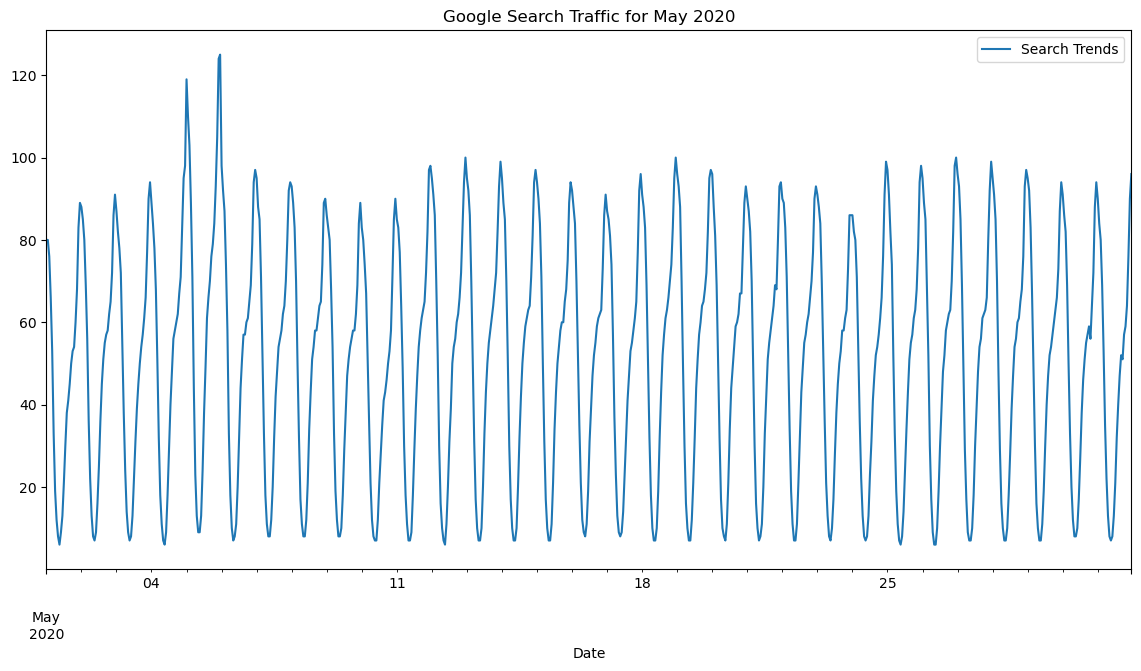

In [75]:
# Slice the DataFrame to just the month of May 2020

may_2020_data = df_mercado_trends.loc['2020-05']

# Plot the search traffic data for May 2020
may_2020_data.plot(title='Google Search Traffic for May 2020', figsize=(14, 7))




#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [77]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = may_2020_data.sum()

# View the traffic_may_2020 value
traffic_may_2020


Search Trends    38181
dtype: int64

In [79]:
# Calcluate the monhtly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
monthly_traffic = df_mercado_trends.resample('M').sum()
median_monthly_traffic = monthly_traffic.median()

# View the median_monthly_traffic value
median_monthly_traffic

Search Trends    35172.5
dtype: float64

In [81]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020/median_monthly_traffic

Search Trends    1.085536
dtype: float64

##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Yes, the Google search traffic did increase during the month of May 2020 when MercadoLibre released its financial results. The search traffic for May 2020 was approximately 8.55% higher than the overall monthly median value across all months. This suggests that the release of the financial results likely drove more interest and searches related to the company.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

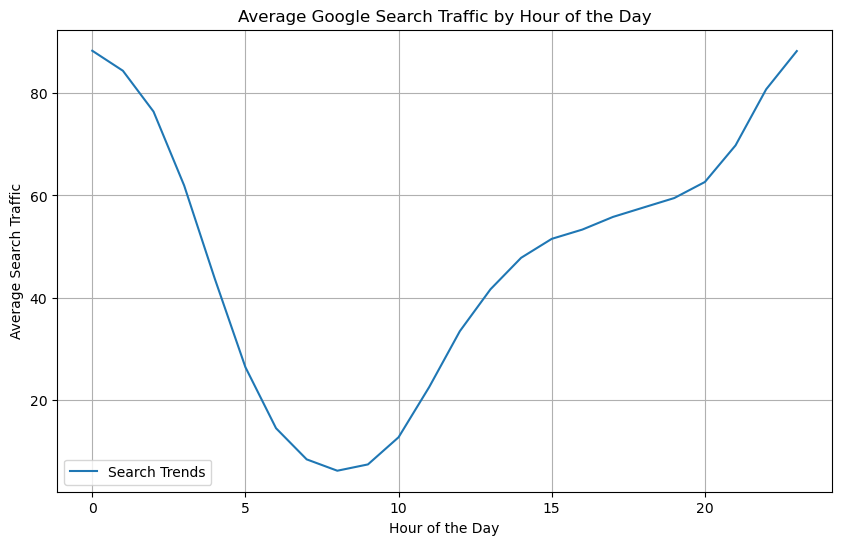

In [19]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`

average_traffic_by_hour = df_mercado_trends.groupby(df_mercado_trends.index.hour).mean()
#
import matplotlib.pyplot as plt
# Plot the average traffic by hour of the day
average_traffic_by_hour.plot(y='Search Trends', kind='line', title='Average Google Search Traffic by Hour of the Day', figsize=(10, 6))
plt.xlabel('Hour of the Day')
plt.ylabel('Average Search Traffic')
plt.grid(True)
plt.show()

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

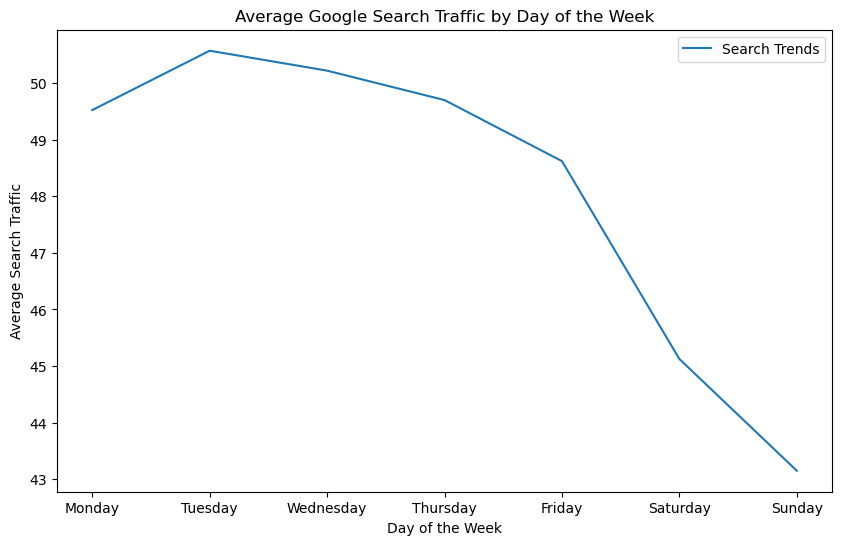

In [85]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.

average_traffic_by_day_of_week = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().day).mean()

# Plot the average traffic by day of the week
average_traffic_by_day_of_week.plot(y='Search Trends', kind='line', title='Average Google Search Traffic by Day of the Week', figsize=(10, 6))
plt.xlabel('Day of the Week')
plt.ylabel('Average Search Traffic')
plt.xticks(ticks=range(1, 8), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.show()


#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

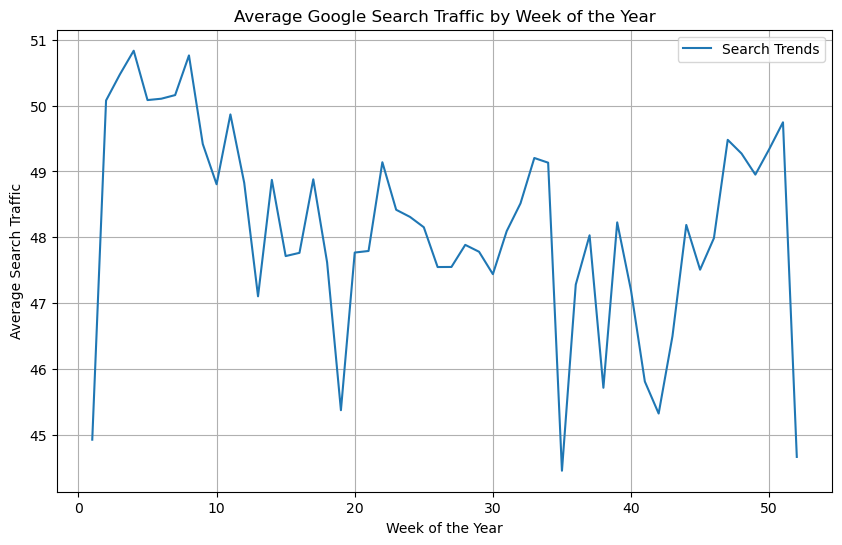

In [87]:

# Group the data by the week of the year using isocalendar().week and calculate the average traffic
average_traffic_by_week_of_year = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week).mean()

# Plot the average traffic by week of the year
average_traffic_by_week_of_year.plot(y='Search Trends', kind='line', title='Average Google Search Traffic by Week of the Year', figsize=(10, 6))
plt.xlabel('Week of the Year')
plt.ylabel('Average Search Traffic')
plt.grid(True)
plt.show()


##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** Based on the analysis of the average Google search traffic by the hour of the day, day of the week, and week of the year, the following time-based trends can be observed:

**Hourly Trends:**
      The search traffic tends to peak during certain hours of the day, typically aligning with business hours or times when people are more active online. This suggests that users may be searching for MercadoLibre during times when they are more likely to shop or engage in online activities.

**Daily Trends:**
        There might be fluctuations in search traffic depending on the day of the week. For example, search traffic could be higher on certain days like Monday or Friday, which might be associated with the beginning or end of the workweek when people are more likely to make online purchases or search for products.

**Weekly/Seasonal Trends:**
        The search traffic could show increases during specific weeks of the year, especially during the holiday season (weeks 40-52), when online shopping tends to surge. This indicates seasonality in user behavior, likely tied to holidays and major sales events

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [89]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


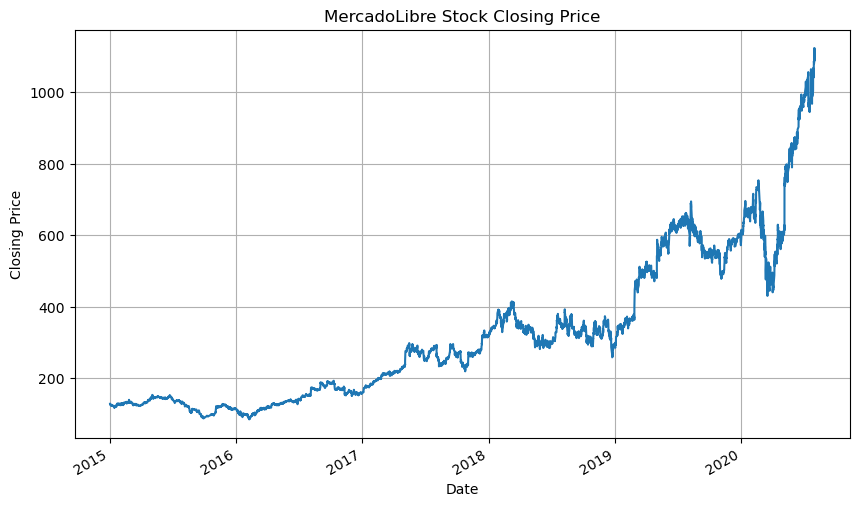

In [93]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock['close'].plot(title='MercadoLibre Stock Closing Price', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


In [28]:
## Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame by columns (axis=1)
df_combined = pd.concat([df_mercado_trends, df_mercado_stock], axis=1).dropna()

# Display the first and last five rows of the combined DataFrame
display(df_combined.head())
display(df_combined.tail())


,Search Trends,close
2016-06-01 09:00:00,6.0,135.16
2016-06-01 10:00:00,12.0,136.63
2016-06-01 11:00:00,22.0,136.56
2016-06-01 12:00:00,33.0,136.42
2016-06-01 13:00:00,40.0,136.10


,Search Trends,close
2020-07-31 11:00:00,20.0,1105.780
2020-07-31 12:00:00,32.0,1087.925
2020-07-31 13:00:00,41.0,1095.800
2020-07-31 14:00:00,47.0,1110.650
2020-07-31 15:00:00,53.0,1122.510


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [95]:
# Slice the combined DataFrame to the first half of 2020 (January to June)
first_half_2020 = df_combined.loc['2020-01':'2020-06']

# Display the first and last five rows of the first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())



,Search Trends,close,Lagged Search Trends,Hourly Stock Return,Stock Volatility
2020-01-02 09:00:00,9.0,601.085,41.0,0.049875,0.029441
2020-01-02 10:00:00,14.0,601.290,9.0,0.000341,0.025102
2020-01-02 11:00:00,25.0,615.410,14.0,0.023483,0.020598
2020-01-02 12:00:00,37.0,611.400,25.0,-0.006516,0.020512
2020-01-02 13:00:00,50.0,611.830,37.0,0.000703,0.016303


,Search Trends,close,Lagged Search Trends,Hourly Stock Return,Stock Volatility
2020-06-30 11:00:00,17.0,976.17,11.0,-0.002656,0.004350
2020-06-30 12:00:00,27.0,977.50,17.0,0.001362,0.003799
2020-06-30 13:00:00,37.0,973.23,27.0,-0.004368,0.003668
2020-06-30 14:00:00,45.0,976.50,37.0,0.003360,0.004174
2020-06-30 15:00:00,51.0,984.93,45.0,0.008633,0.005802


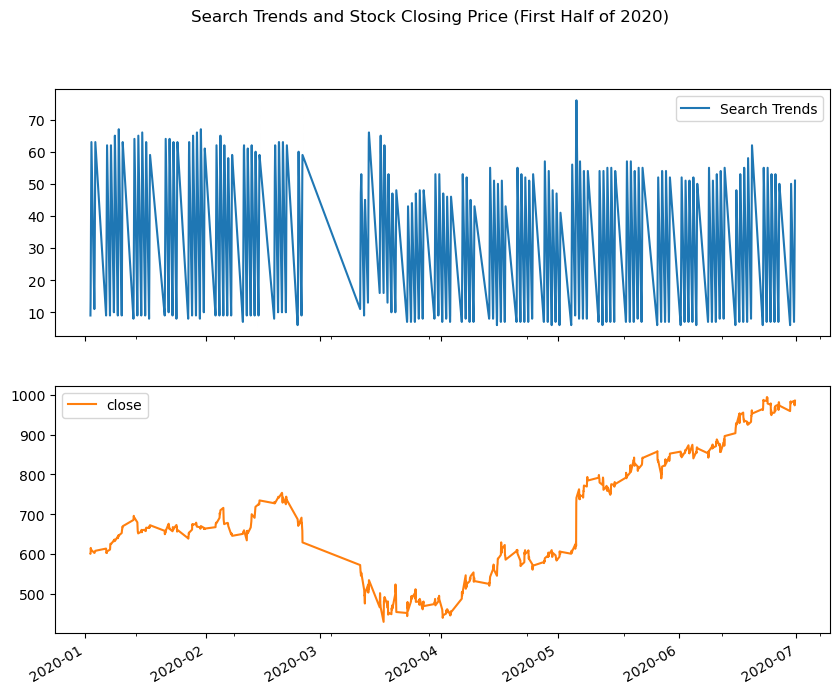

In [97]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`

first_half_2020[['Search Trends', 'close']].plot(subplots=True, title='Search Trends and Stock Closing Price (First Half of 2020)', figsize=(10, 8))
plt.show()


##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Both time series for the first half of 2020 show a common trend where MercadoLibre’s stock price experienced fluctuations that align with changes in search traffic trends. Following the initial shock to global financial markets in early 2020, the data suggests an increase in search traffic, which coincides with a rise in stock prices. This trend aligns with the narrative that e-commerce platforms like MercadoLibre saw increased user engagement and revenue after the initial market disruptions, reflecting a shift in consumer behavior toward online shopping during the pandemic.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [99]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour

df_combined['Lagged Search Trends'] = df_combined['Search Trends'].shift(1)


In [101]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window

# 
df_combined['Hourly Stock Return'] = df_combined['close'].pct_change()

#
df_combined['Stock Volatility'] = df_combined['Hourly Stock Return'].ewm(span=4).std()


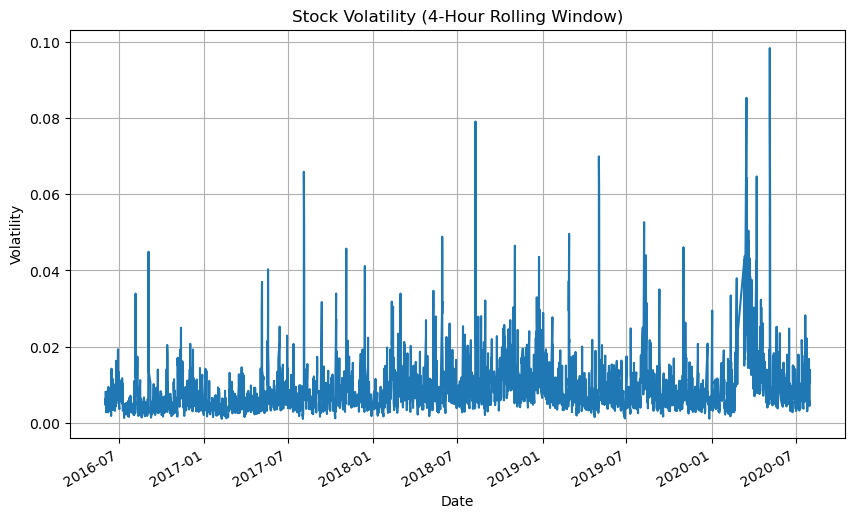

In [103]:
# Visualize the stock volatility
df_combined['Stock Volatility'].plot(title='Stock Volatility (4-Hour Rolling Window)', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [105]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price

df_combined['Hourly Stock Return'] = df_combined['close'].pct_change()


In [107]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(df_combined[['Hourly Stock Return', 'Stock Volatility', 'Lagged Search Trends']].head())
display(df_combined[['Hourly Stock Return', 'Stock Volatility', 'Lagged Search Trends']].tail())


,Hourly Stock Return,Stock Volatility,Lagged Search Trends
2016-06-01 09:00:00,NaN,NaN,NaN
2016-06-01 10:00:00,0.010876,NaN,6.0
2016-06-01 11:00:00,-0.000512,0.008053,12.0
2016-06-01 12:00:00,-0.001025,0.005801,22.0
2016-06-01 13:00:00,-0.002346,0.004628,33.0


,Hourly Stock Return,Stock Volatility,Lagged Search Trends
2020-07-31 11:00:00,0.006380,0.012486,11.0
2020-07-31 12:00:00,-0.016147,0.013175,20.0
2020-07-31 13:00:00,0.007239,0.012882,32.0
2020-07-31 14:00:00,0.013552,0.012971,41.0
2020-07-31 15:00:00,0.010678,0.010591,47.0


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [109]:

# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
correlation_table = df_combined[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

# Display the correlation table
correlation_table.head()


,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.081665,0.067877
Lagged Search Trends,-0.081665,1.000000,0.017929
Hourly Stock Return,0.067877,0.017929,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** There does not appear to be a predictable relationship between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns. The low correlation coefficients suggest that these factors are largely independent of each other in this dataset.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [111]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet

prophet_df.rename(columns={'Date': 'ds', 'Search Trends': 'y'}, inplace=True)
# Drop an NaN values from the prophet_df DataFrame
prophet_df.dropna(inplace=True)

# View the first and last five rows of the mercado_prophet_df DataFrame
display(prophet_df.head())
display(prophet_df.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [113]:
# Call the Prophet function, store as an object
from prophet import Prophet
model = Prophet()

In [115]:
# Fit the time-series model.
model.fit(prophet_df)

10:42:50 - cmdstanpy - INFO - Chain [1] start processing
10:42:58 - cmdstanpy - INFO - Chain [1] done processing


In [116]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')


# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail()

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [119]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame

forecast_mercado_trends = model.predict(future_mercado_trends)
# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.129250,80.863852,98.398764,44.129250,44.129250,45.429305,45.429305,45.429305,41.452726,...,1.860133,1.860133,1.860133,2.116445,2.116445,2.116445,0.0,0.0,0.0,89.558555
1,2016-06-01 01:00:00,44.130313,78.346981,94.282517,44.130313,44.130313,41.875073,41.875073,41.875073,37.943506,...,1.810049,1.810049,1.810049,2.121518,2.121518,2.121518,0.0,0.0,0.0,86.005386
2,2016-06-01 02:00:00,44.131375,67.356109,84.008714,44.131375,44.131375,31.551566,31.551566,31.551566,27.656533,...,1.768474,1.768474,1.768474,2.126559,2.126559,2.126559,0.0,0.0,0.0,75.682942
3,2016-06-01 03:00:00,44.132438,51.306098,68.842083,44.132438,44.132438,16.284352,16.284352,16.284352,12.417280,...,1.735502,1.735502,1.735502,2.131569,2.131569,2.131569,0.0,0.0,0.0,60.416789
4,2016-06-01 04:00:00,44.133500,35.182901,51.352794,44.133500,44.133500,-0.830504,-0.830504,-0.830504,-4.678139,...,1.711088,1.711088,1.711088,2.136547,2.136547,2.136547,0.0,0.0,0.0,43.302997


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

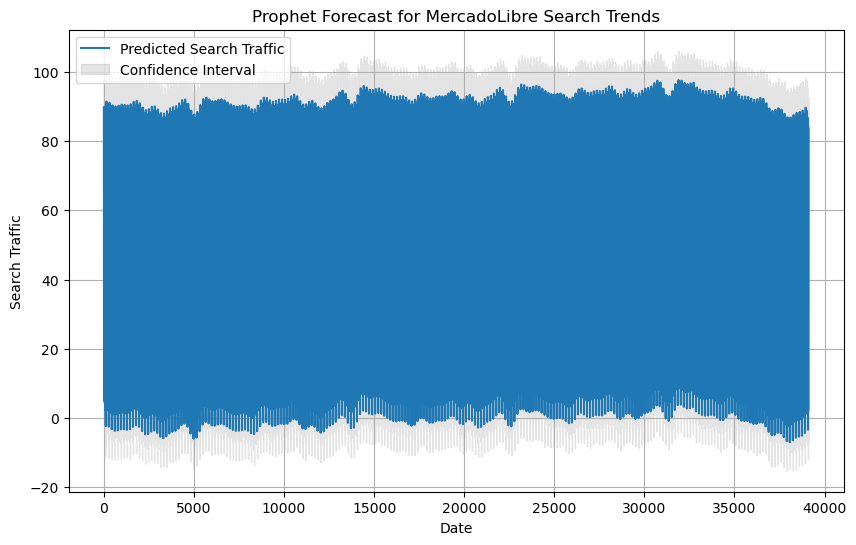

In [121]:
# Plot the Prophet predictions for the Mercado trends data
# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(forecast_mercado_trends['yhat'], label='Predicted Search Traffic')
plt.fill_between(forecast_mercado_trends.index, 
                 forecast_mercado_trends['yhat_lower'], 
                 forecast_mercado_trends['yhat_upper'], 
                 color='gray', alpha=0.2, label='Confidence Interval')

plt.title('Prophet Forecast for MercadoLibre Search Trends')
plt.xlabel('Date')
plt.ylabel('Search Traffic')
plt.legend()
plt.grid(True)
plt.show()



##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**
Based on the Prophet model's predictions, the near-term forecast for the popularity of MercadoLibre shows steady growth with fluctuations in search traffic.

#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [123]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column


forecast_mercado_trends.set_index('ds', inplace=True)
# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame

forecast_summary = forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

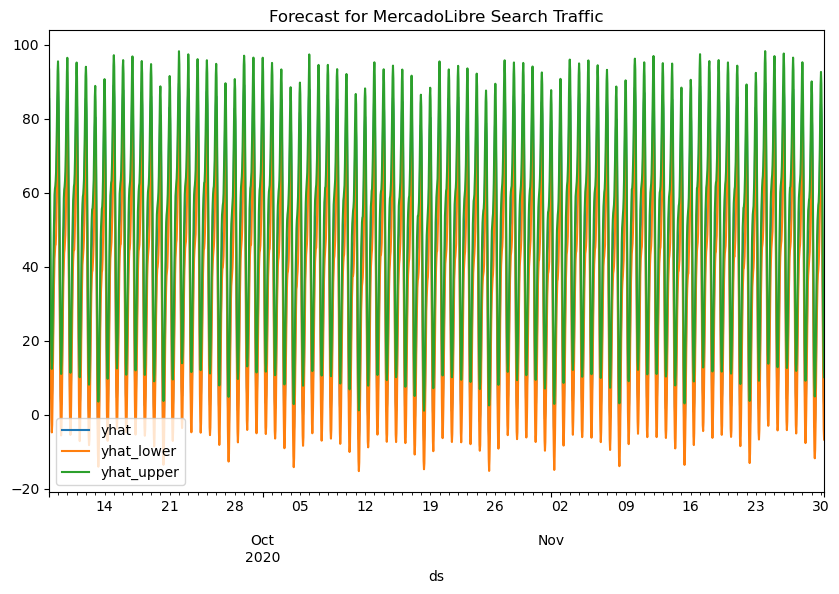

In [125]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours

forecast_summary[-2000:].plot(figsize=(10, 6), title="Forecast for MercadoLibre Search Traffic")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior,

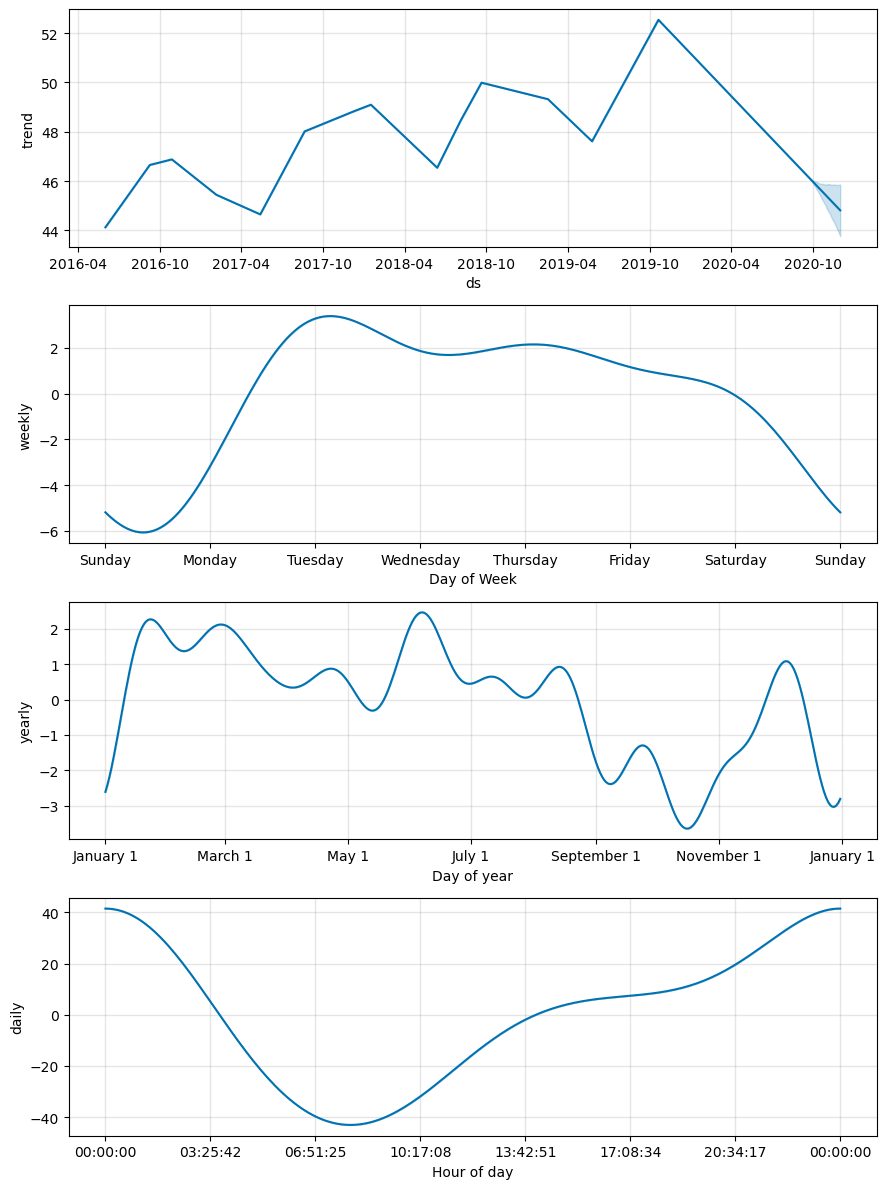

In [127]:
# Reset the index in the forecast_mercado_trends DataFrame

forecast_mercado_trends.reset_index(inplace=True)


# Use the plot_components function to visualize the forecast results
# for the forecast_mercado_trends DataFrame# Visualize the forecast components (trend, daily, and weekly seasonality)
model.plot_components(forecast_mercado_trends)
plt.show()


##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** 00.00.00 time is the time of day exhibits the greatest popularity

**Question:** Which day of week gets the most search traffic?
   
**Answer:** Tuesday gets the most search traffic.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** End of september is the lowest point for search traffic in the calendar year
